# Deskripsi library yang digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Data Set

In [3]:
df = pd.read_csv('car data.csv')

# Deskripsi DataSet

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


<Axes: >

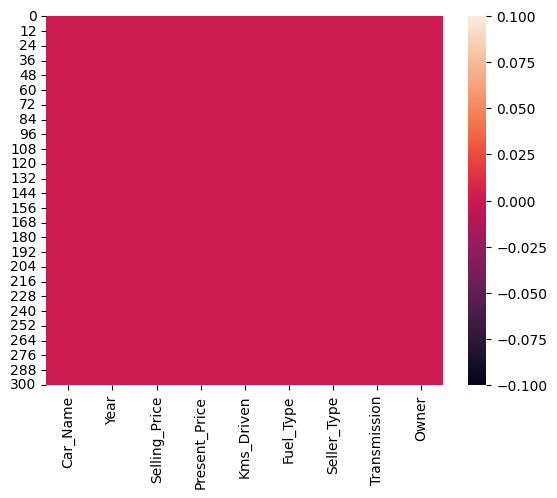

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Visualisasi Data

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'ritz'

<Figure size 1000x800 with 0 Axes>

# Jumlah Mobil Berdasarkan Tahun

In [9]:
Year = df.groupby('Year').count()[['Kms_Driven']].sort_values(by='Kms_Driven', ascending=True).reset_index()
Year = Year.rename(columns={'Kms_Driven':'Jarak'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '2003'),
  Text(1, 0, '2004'),
  Text(2, 0, '2005'),
  Text(3, 0, '2006'),
  Text(4, 0, '2007'),
  Text(5, 0, '2008'),
  Text(6, 0, '2009'),
  Text(7, 0, '2010'),
  Text(8, 0, '2011'),
  Text(9, 0, '2012'),
  Text(10, 0, '2013'),
  Text(11, 0, '2014'),
  Text(12, 0, '2015'),
  Text(13, 0, '2016'),
  Text(14, 0, '2017'),
  Text(15, 0, '2018')])

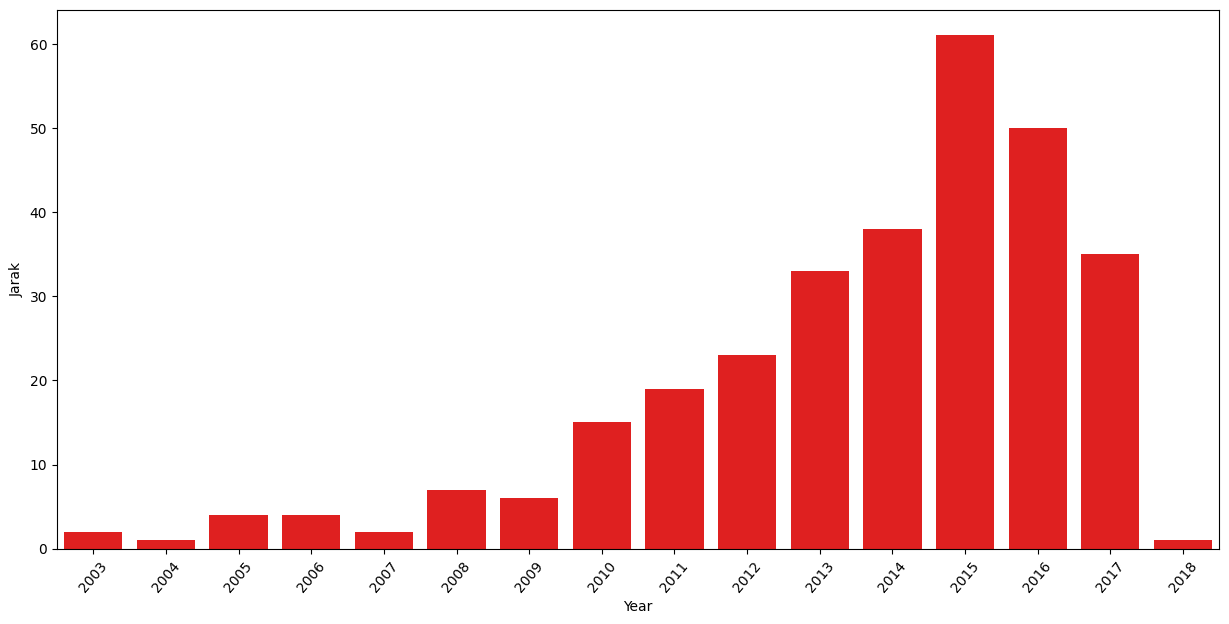

In [10]:
fig = plt.figure(figsize = (15,7))
sns.barplot(x = Year['Year'], y = Year['Jarak'], color = 'red')
plt.xticks(rotation = 50)

# Kondisi Mobil

C:\Users\HP\AppData\Local\Temp\ipykernel_8352\2822982518.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Selling_Price'])


<Axes: xlabel='Selling_Price', ylabel='Density'>

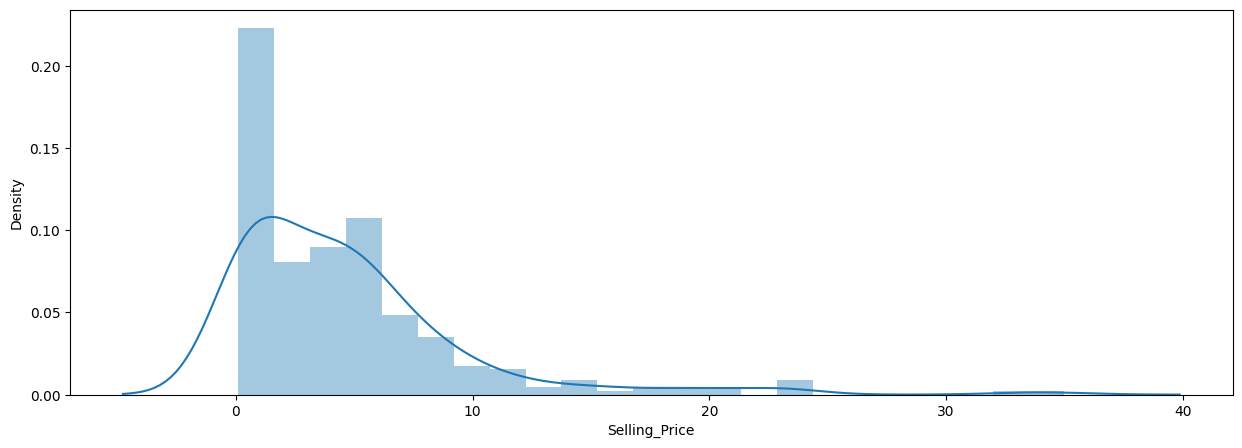

In [12]:
plt.figure(figsize=(15,5))
sns.distplot(df['Selling_Price'])

C:\Users\HP\AppData\Local\Temp\ipykernel_8352\1221982512.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Kms_Driven'])


<Axes: xlabel='Kms_Driven', ylabel='Density'>

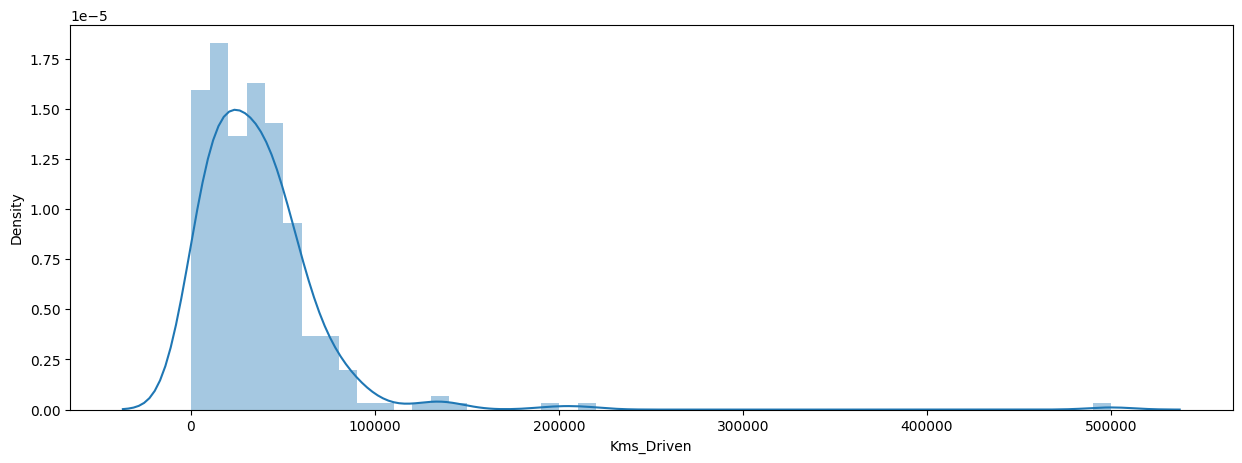

In [13]:
plt.figure(figsize=(15,5))
sns.distplot(df['Kms_Driven'])

# Seleksi Fitur

In [14]:
fitur = ['Selling_Price','Year','Present_Price','Kms_Driven']
x = df[fitur]
y = df['Owner']
x.shape, y.shape

((301, 4), (301,))

# Split Data Training dan Data Testing

In [15]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(76,)

# Membuat Model Regresi Linier

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [17]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  -0.02450323695148615


# Membuat inputan model regresi linier

In [18]:
#Selling_Price=4.75, Year=2013, Present_Price=9.54, Kms_Driven=43000
input_data = np.array([[4.75,2013,9.54,43000]])

prediction = lr.predict(input_data)
print('Estimasi Pemilik Mobil :', prediction)

Estimasi Pemilik Mobil : [0.06283795]


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Save Model

In [19]:
import pickle

filename = 'estimasi_mobil.sav'
pickle.dump(lr,open(filename,'wb'))